# Week 6-2 영어 리뷰 단어 분포 살펴보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('C:\jwkim\lecture\LG전자_22')
review_df=pd.read_csv("thinq_e_review.csv")


In [2]:
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  
0      This app no longer works. It has just updated ...  
1      Everything worked fine until a week or so ago....  
2      App doesn't work with wired TV connection. EDI...  
3      I'm trying this again by have Alexa connection...  
4      Just embarrassing. Absolutely, 100%, will not ...  
...                                                  ...  
11275                            Good app. useful so far  
11276           Its been helpful. Hope it stays that way  
11277  Worked like it should and gave me feedback tha...  
11278                            error routed device.. .  
11279               Not connected with washing machine 😞  

[11280 rows x 4 columns]

In [6]:
review_df.loc[0,"comment"].split(' ')

['This',
 'app',
 'no',
 'longer',
 'works.',
 'It',
 'has',
 'just',
 'updated',
 'and',
 'tells',
 'me',
 'my',
 'login',
 'is',
 'incorrect,',
 'not',
 'only',
 'that,',
 'after',
 'about',
 'three',
 'attempts',
 'it',
 'tells',
 'me',
 'my',
 'account',
 'has',
 'had',
 'too',
 'many',
 'login',
 'attempts',
 'and',
 'sends',
 'me',
 'an',
 'email',
 'to',
 'verify',
 'the',
 'account.',
 'Logging',
 'in',
 'on',
 'their',
 'website',
 'works',
 'fine.',
 'They',
 'released',
 'this',
 'update',
 'yesterday',
 '...\nFull',
 'Review']

In [7]:
#word count
word_counts = review_df['comment'].apply(lambda x:len(x.split(' ')))

In [8]:
word_counts.head()

0    57
1    59
2    56
3    58
4    57
Name: comment, dtype: int64

In [9]:
word_counts.describe()

count    11280.000000
mean        26.573670
std         18.052904
min          2.000000
25%         11.000000
50%         21.000000
75%         40.000000
max         71.000000
Name: comment, dtype: float64

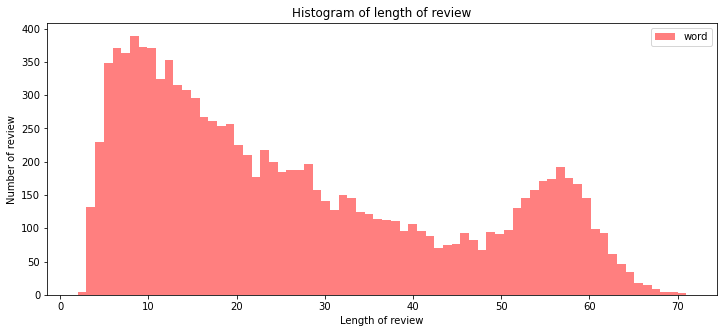

In [10]:
# word count 히스토그램 그리기
plt.figure(figsize=(12, 5))
plt.hist(word_counts, bins=70, alpha=0.5, color= 'r', label='word')
plt.legend()
# 그래프 제목
plt.title('Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='comment'>

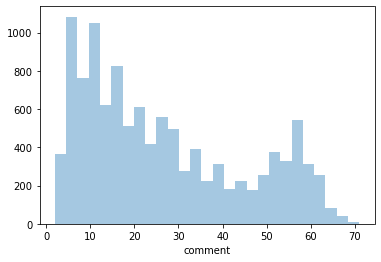

In [12]:
# sns에서 히스토그램 그리기

sns.distplot(word_counts,kde=False)
#sns.distplot(word_counts)

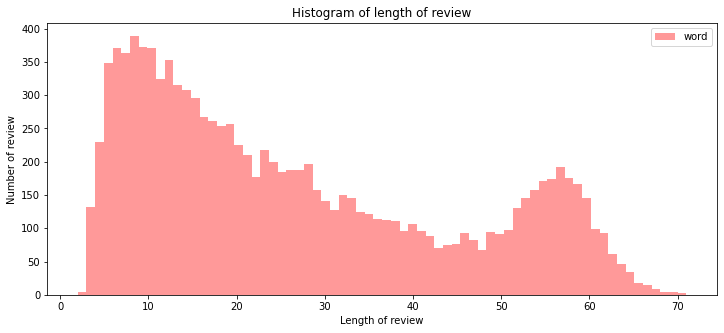

In [13]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(word_counts,kde=False,bins=70,color='r')
ax.set_xlabel('Length of review')
ax.set_ylabel('Number of review')
ax.set_title('Histogram of length of review')
ax.legend(labels=['word'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2ca6c60a9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ca6c5ef6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ca6c60a3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2ca6c64fdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ca6c6bee80>],
 'means': [<matplotlib.lines.Line2D at 0x2ca6c631340>]}

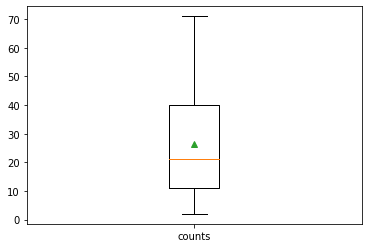

In [14]:
# 박스 플랏
plt.boxplot(word_counts,
             labels=['counts'],
             showmeans=True)

<AxesSubplot:>

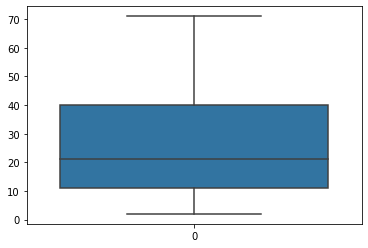

In [15]:
sns.boxplot(data=word_counts)

In [18]:
print(review_df.loc[0,"comment"])
print(review_df.loc[1,"comment"])

This app no longer works. It has just updated and tells me my login is incorrect, not only that, after about three attempts it tells me my account has had too many login attempts and sends me an email to verify the account. Logging in on their website works fine. They released this update yesterday ...
Full Review
Everything worked fine until a week or so ago. Now it will not connect to my oven anymore. Tried starting over and it says it may not work with a 5ghz network, try setting your router to 2.4ghz and try again. Um. No. Everything was just working fine, I have not changed my router settings, and I'm no...
Full Review


In [19]:
' '.join(review_df.loc[:1,"comment"])

"This app no longer works. It has just updated and tells me my login is incorrect, not only that, after about three attempts it tells me my account has had too many login attempts and sends me an email to verify the account. Logging in on their website works fine. They released this update yesterday ...\nFull Review Everything worked fine until a week or so ago. Now it will not connect to my oven anymore. Tried starting over and it says it may not work with a 5ghz network, try setting your router to 2.4ghz and try again. Um. No. Everything was just working fine, I have not changed my router settings, and I'm no...\nFull Review"

(-0.5, 799.5, 599.5, -0.5)

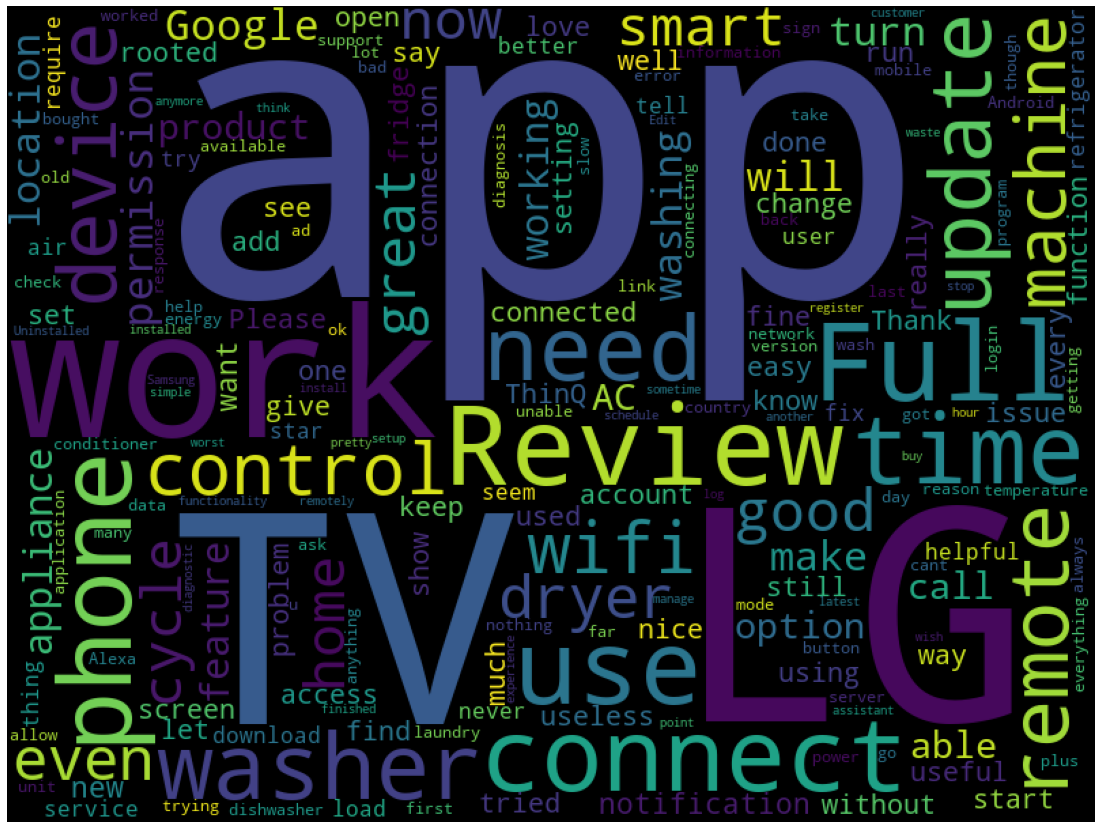

In [20]:
# 워드 클라우드 그리기
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600, collocations = False).generate(" ".join(review_df['comment']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

1    5318
2    1164
3    1127
4    1112
5    2559
Name: star, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='star', ylabel='count'>

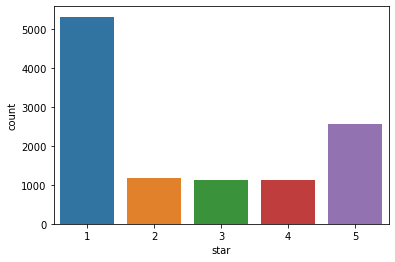

In [21]:
# 평점 분포
print(review_df['star'].value_counts().sort_index())
sns.countplot(review_df['star'],order=review_df['star'].value_counts().sort_index().index)

In [22]:
review_df['star'].mean()

2.506205673758865